In [1]:
import utils_simulation as ut
import copulas_impl as cop
import pandas as pd
import pricer

In [2]:
portfolio = ut.load_portfolio()
correlation_matrix = pd.read_csv("correlation_matrix.csv", header=None)
portfolio.head()

,Loan_ID,Loan_Amount,Maturity_Years,Default_Probability,Interest_Rate
0,Loan_1,1.061810e+06,2,0.156484,0.042787
1,Loan_2,1.926071e+06,2,0.103821,0.022951
2,Loan_3,1.597991e+06,4,0.109319,0.068765
3,Loan_4,1.397988e+06,8,0.091233,0.060214
4,Loan_5,7.340280e+05,7,0.014830,0.024118


# Simulation Générale

## Gaussian Copulas

In [7]:
gaussian_samples = cop.gaussian_copula_sample(correlation_matrix.to_numpy(), 1)

In [10]:
gaussian_samples.shape

(50,)

In [225]:
defaults_matrix = ut.simulate_defaults(gaussian_samples, portfolio["Default_Probability"].values)

Résumé des scénarios de défauts :
Taux moyen de défaut : 9.74%
Taux minimum de défaut : 2.00%
Taux maximum de défaut : 24.00%


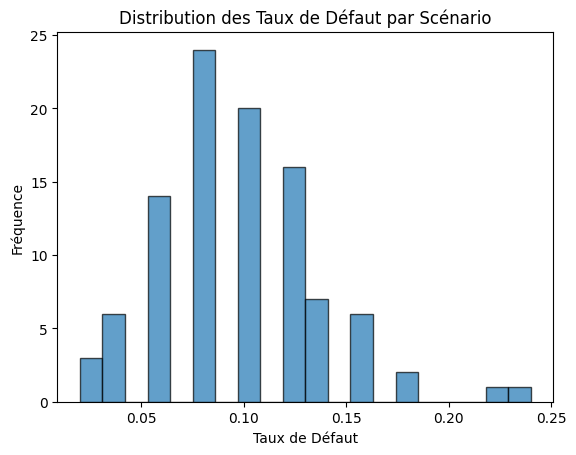

Probabilité de scénarios avec plus de 30% de défauts : 0.00%


/Users/Mel/Desktop/Ecole_Inge/MFD/Risque de Credit et Défaut/Copulas_For_Credit_Risk/creditProj/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/Mel/Desktop/Ecole_Inge/MFD/Risque de Credit et Défaut/Copulas_For_Credit_Risk/creditProj/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


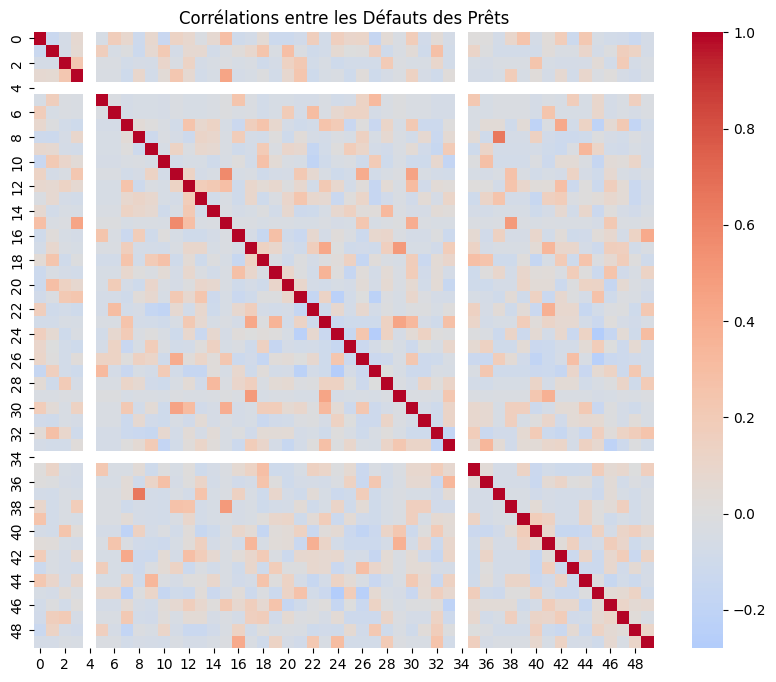

Pertes moyennes : $3,482,421
Pertes maximales : $8,935,140
Pertes minimales : $580,540


/Users/Mel/Desktop/Ecole_Inge/MFD/Risque de Credit et Défaut/Copulas_For_Credit_Risk/utils_simulation.py:70: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates_by_tranche = portfolio.groupby("Tranche")["Average_Default_Contribution"].mean()


Taux de défaut moyen par tranche :
 Tranche
0-1M      0.090000
1-1.5M    0.109375
1.5-2M    0.095000
Name: Average_Default_Contribution, dtype: float64


In [5]:
ut.print_summary(defaults_matrix, portfolio, recovery_rate=0.4)

## Clayton Copulas

In [63]:
Clayton_samples = cop.clayton_copula_multivariate(theta=10,num_samples=100,portfolio_size=len(portfolio)) # theta >= -1

In [64]:
defaults_matrix = ut.simulate_defaults(Clayton_samples, portfolio["Default_Probability"].values)

In [65]:
defaults_matrix

array([[1, 1, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 1, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], shape=(100, 50))

Résumé des scénarios de défauts :
Taux moyen de défaut : 20.56%
Taux minimum de défaut : 2.00%
Taux maximum de défaut : 100.00%


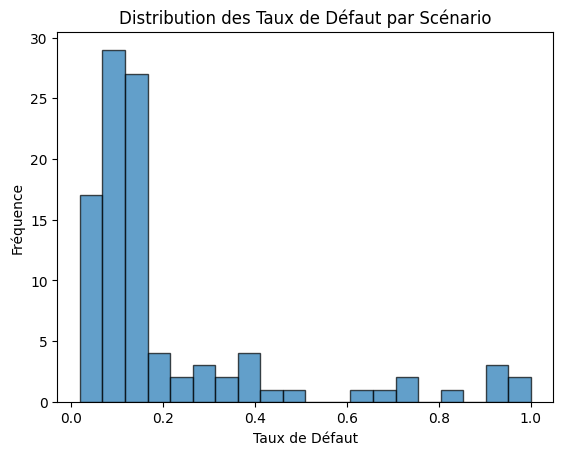

Probabilité de scénarios avec plus de 30% de défauts : 18.00%


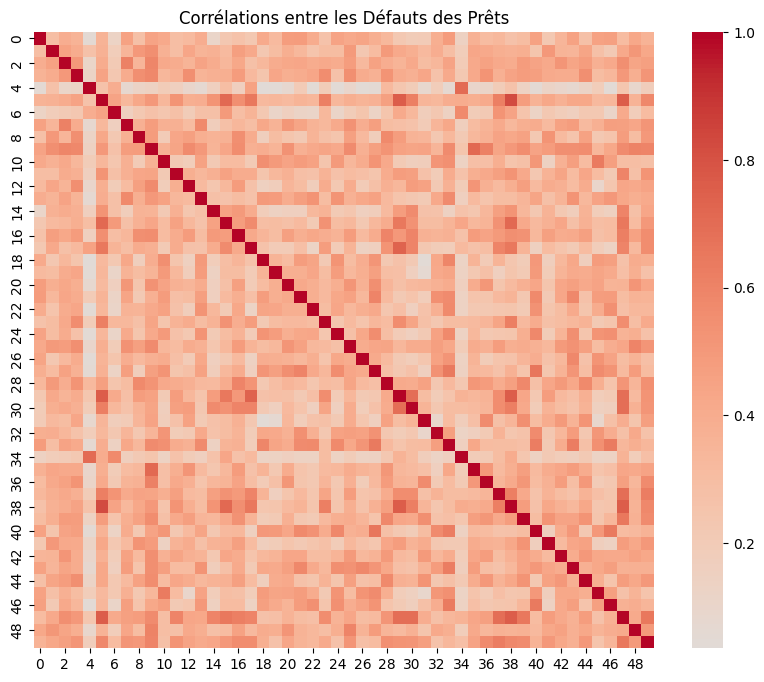

Pertes moyennes : $7,147,739
Pertes maximales : $35,066,576
Pertes minimales : $358,546
Taux de défaut moyen par tranche :
 Tranche
0-1M      0.209545
1-1.5M    0.216875
1.5-2M    0.183333
Name: Average_Default_Contribution, dtype: float64


/Users/Mel/Desktop/Ecole_Inge/MFD/Risque de Credit et Défaut/Copulas_For_Credit_Risk/utils_simulation.py:70: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates_by_tranche = portfolio.groupby("Tranche")["Average_Default_Contribution"].mean()


In [66]:
ut.print_summary(defaults_matrix, portfolio, recovery_rate=0.4)

## Gumbel Copulas

In [73]:
Gumbel_samples = cop.gumbel_copula_multivariate(theta=100,num_samples=100,portfolio_size=len(portfolio)) # Theta >= 1

In [74]:
defaults_matrix = ut.simulate_defaults(Gumbel_samples, portfolio["Default_Probability"].values)

Résumé des scénarios de défauts :
Taux moyen de défaut : 15.28%
Taux minimum de défaut : 0.00%
Taux maximum de défaut : 86.00%


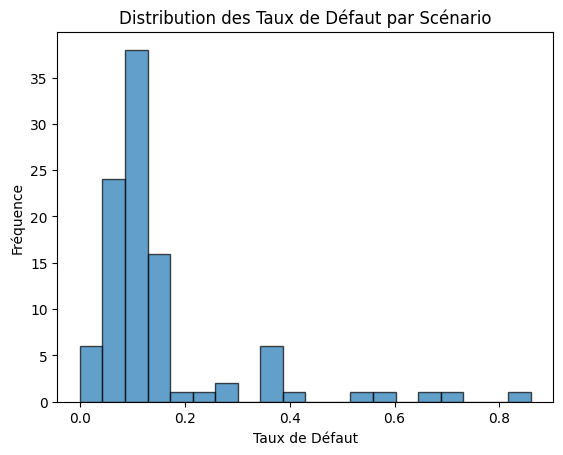

Probabilité de scénarios avec plus de 30% de défauts : 12.00%


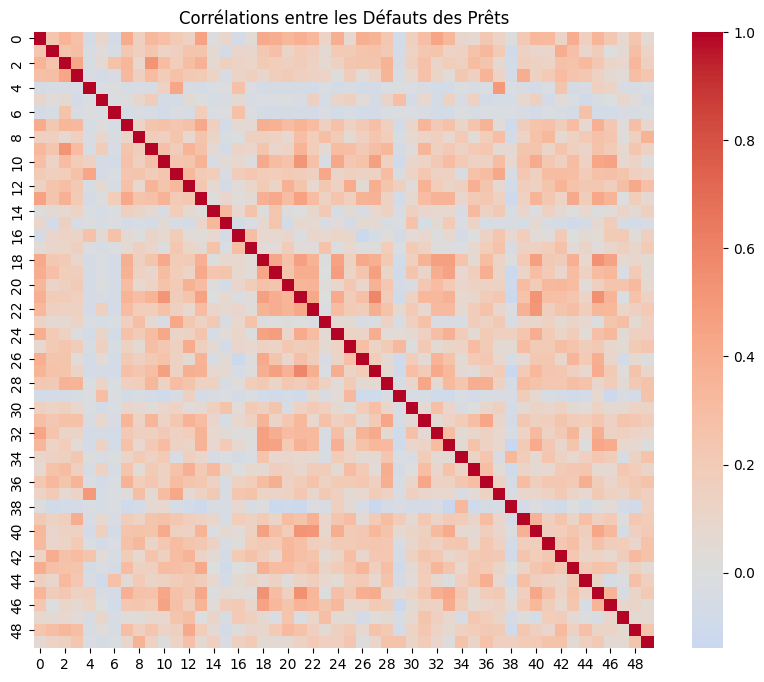

Pertes moyennes : $5,342,701
Pertes maximales : $30,941,741
Pertes minimales : $0
Taux de défaut moyen par tranche :
 Tranche
0-1M      0.157727
1-1.5M    0.151250
1.5-2M    0.145833
Name: Average_Default_Contribution, dtype: float64


/Users/Mel/Desktop/Ecole_Inge/MFD/Risque de Credit et Défaut/Copulas_For_Credit_Risk/utils_simulation.py:70: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates_by_tranche = portfolio.groupby("Tranche")["Average_Default_Contribution"].mean()


In [75]:
ut.print_summary(defaults_matrix, portfolio, recovery_rate=0.4)

# Tranches

### We first test with the Gaussian Copula

In [9]:
gaussian_samples = cop.gaussian_copula_sample(correlation_matrix.to_numpy(), 100)
defaults_matrix = ut.simulate_defaults(gaussian_samples, portfolio["Default_Probability"].values)
equity_losses, mezzanine_losses, senior_losses =  ut.allocate_losses_by_transches(defaults_matrix, portfolio)

     Tranche  Pertes Moyennes  Pertes Maximales  Pertes Minimales
0     Senior         0.000141            0.0002               0.0
1  Mezzanine         1.376782           37.9570               0.0
2     Equity        60.842228          100.0000               0.0


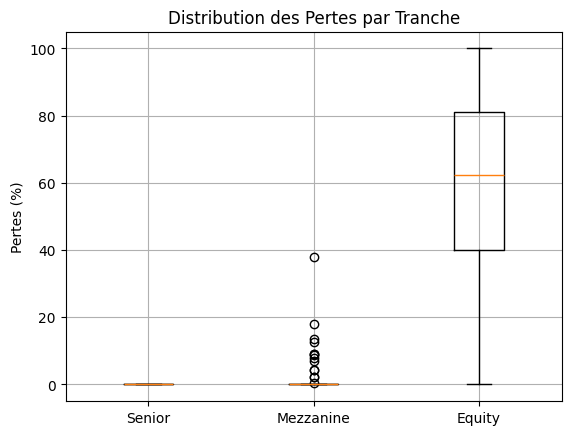

In [10]:
ut.simmulate_losses_tranche(equity_losses, mezzanine_losses, senior_losses)

### Test With Clayton Copulas

In [11]:
Clayton_samples = cop.clayton_copula_multivariate(theta=1,num_samples=100,portfolio_size=len(portfolio))
defaults_matrix = ut.simulate_defaults(Clayton_samples, portfolio["Default_Probability"].values)
equity_losses, mezzanine_losses, senior_losses =  ut.allocate_losses_by_transches(defaults_matrix, portfolio)

     Tranche  Pertes Moyennes  Pertes Maximales  Pertes Minimales
0     Senior         0.000161            0.0002            0.0000
1  Mezzanine        20.619211          100.0000            0.0000
2     Equity        71.618246          100.0000           15.3355


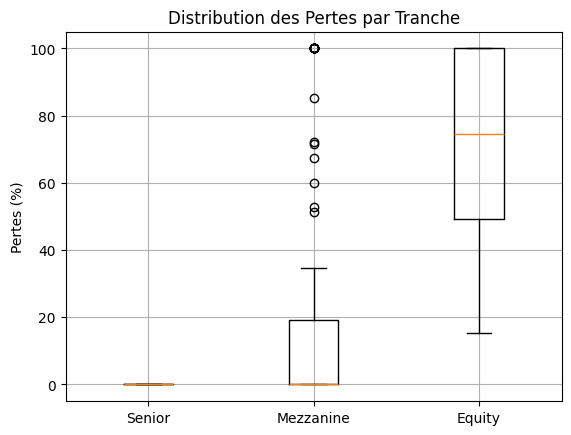

In [12]:
ut.simmulate_losses_tranche(equity_losses, mezzanine_losses, senior_losses)

### Test with Gumbel Copulas

In [13]:
Gumbel_samples = cop.gumbel_copula_multivariate(theta=1,num_samples=100,portfolio_size=len(portfolio))
defaults_matrix = ut.simulate_defaults(Gumbel_samples, portfolio["Default_Probability"].values)
equity_losses, mezzanine_losses, senior_losses =  ut.allocate_losses_by_transches(defaults_matrix, portfolio)

     Tranche  Pertes Moyennes  Pertes Maximales  Pertes Minimales
0     Senior         0.000178            0.0002            0.0000
1  Mezzanine        27.349448          100.0000            0.0000
2     Equity        83.492788          100.0000           18.7146


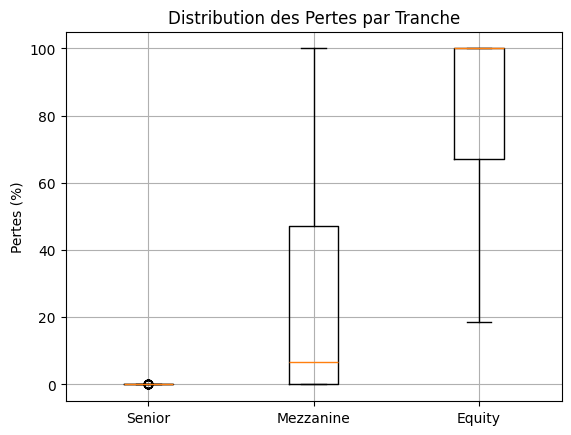

In [14]:
ut.simmulate_losses_tranche(equity_losses, mezzanine_losses, senior_losses)

# Pricing

## 1. Gaussian

In [3]:
net_cash_flows, tranche_prices, interest_payments, principal_payments, loan_states, losses_per_period, initial_investment, expected_perf = pricer.pricing_CLO_multi_periode_gaussian(correlation_matrix,portfolio)

In [16]:
loan = 0

In [17]:
losses_per_period[0,loan,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
interest_payments[0,loan,:]

array([17703.50663708, 17703.50663708, 17703.50663708, 17703.50663708,
       17703.50663708, 17703.50663708, 17703.50663708,     0.        ,
           0.        ])

In [11]:
principal_payments[0,loan,:]

array([     0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        , 734027.96066365,      0.        ,
            0.        ])

In [9]:
loan_states[0,loan,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
portfolio

,Loan_ID,Loan_Amount,Maturity_Years,Default_Probability,Interest_Rate
0,Loan_1,1.061810e+06,2,0.156484,0.042787
1,Loan_2,1.926071e+06,2,0.103821,0.022951
2,Loan_3,1.597991e+06,4,0.109319,0.068765
3,Loan_4,1.397988e+06,8,0.091233,0.060214
4,Loan_5,7.340280e+05,7,0.014830,0.024118
5,Loan_6,7.339918e+05,9,0.030499,0.042292
6,Loan_7,5.871254e+05,8,0.015972,0.092661
7,Loan_8,1.799264e+06,5,0.130918,0.039165
8,Loan_9,1.401673e+06,2,0.069728,0.031592
9,Loan_10,1.562109e+06,5,0.106628,0.059156


In [4]:
tranche_prices

{'Senior': np.float64(42436390.85248777),
 'Mezzanine': np.float64(817931.610687669),
 'Equity': np.float64(-5547556.878720968)}

In [8]:
initial_investment

array([ 5844429.28294196, 11688858.56588392, 40911004.9805937 ])

In [9]:
expected_perf

[np.float64(5844429.282941959),
 np.float64(12390190.079836952),
 np.float64(42547445.17981745)]

In [21]:
portfolio["Loan_Amount"].sum()

np.float64(58444292.82941958)

## 2. Clayton

In [3]:
net_cash_flows, tranche_prices, interest_payments, principal_payments, loan_states, losses_per_period, initial_investment, expected_perf = pricer.pricing_CLO_multi_periode_clayton("clayton", portfolio)

In [8]:
loan = 0

In [9]:
losses_per_period[0,loan,:]

array([637086.10696263,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ])

In [10]:
interest_payments[0,loan,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
principal_payments[0,loan,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
loan_states[0,loan,:]

array([1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
tranche_prices

{'Senior': np.float64(7004384.205266284),
 'Mezzanine': np.float64(-10357114.54548263),
 'Equity': np.float64(-5844429.282941959)}

In [24]:
initial_investment

array([ 5844429.28294196, 11688858.56588392, 40911004.9805937 ])

In [25]:
expected_perf

[np.float64(5844429.282941959),
 np.float64(12390190.079836952),
 np.float64(42547445.17981745)]

In [26]:
portfolio

,Loan_ID,Loan_Amount,Maturity_Years,Default_Probability,Interest_Rate
0,Loan_1,1.061810e+06,2,0.156484,0.042787
1,Loan_2,1.926071e+06,2,0.103821,0.022951
2,Loan_3,1.597991e+06,4,0.109319,0.068765
3,Loan_4,1.397988e+06,8,0.091233,0.060214
4,Loan_5,7.340280e+05,7,0.014830,0.024118
5,Loan_6,7.339918e+05,9,0.030499,0.042292
6,Loan_7,5.871254e+05,8,0.015972,0.092661
7,Loan_8,1.799264e+06,5,0.130918,0.039165
8,Loan_9,1.401673e+06,2,0.069728,0.031592
9,Loan_10,1.562109e+06,5,0.106628,0.059156


## 3. Gumbel

In [10]:
net_cash_flows, tranche_prices, interest_payments, principal_payments, loan_states, losses_per_period, initial_investment, expected_perf = pricer.pricing_CLO_multi_periode_clayton("gumbel", portfolio)

In [11]:
tranche_prices

{'Senior': np.float64(-12457110.307755508),
 'Mezzanine': np.float64(-11591540.16854991),
 'Equity': np.float64(-5844429.282941958)}

In [12]:
initial_investment

array([ 5844429.28294196, 11688858.56588392, 40911004.9805937 ])

In [20]:
import numpy as np
tranches_result = np.array([tranche_prices["Equity"],tranche_prices["Mezzanine"],tranche_prices["Senior"]])
perc_perf = (tranches_result - initial_investment)/initial_investment*100
perc_perf

array([-200.        , -199.167426  , -130.44928941])

# Risk Analysis and Scenario testing

In [5]:
import risk_metrics as risk

In [6]:
initial_investment_dict = {'Equity':initial_investment[0],
                           'Mezzanine':initial_investment[1],
                           'Senior':initial_investment[2]}

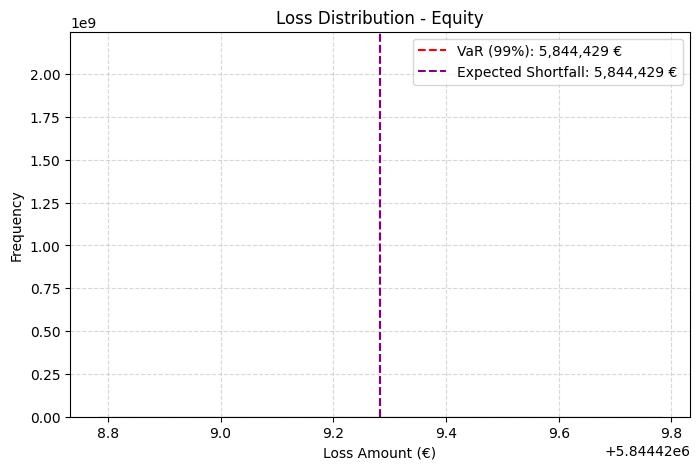

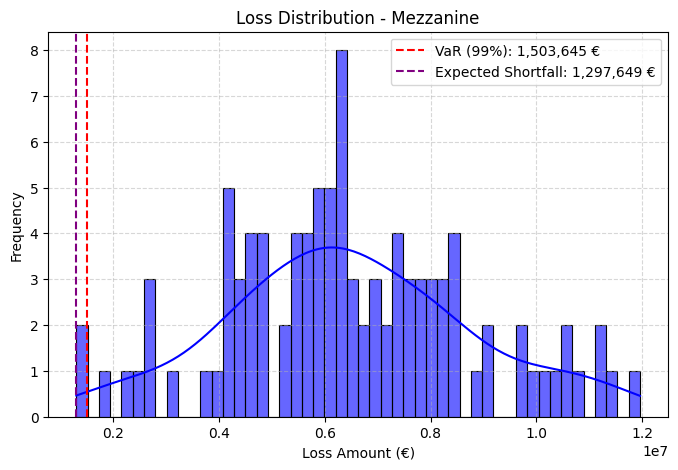

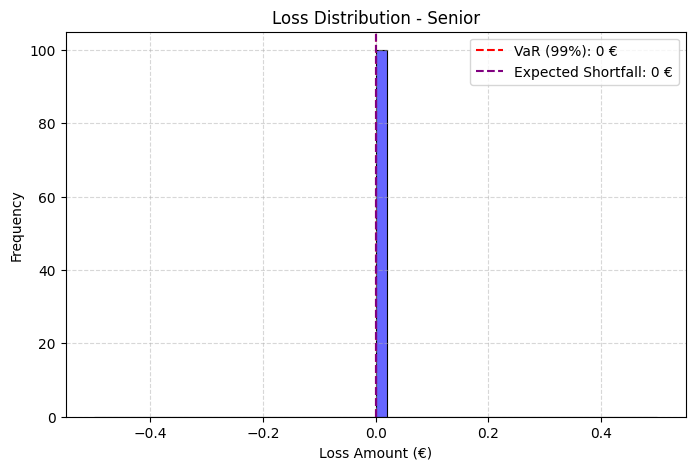

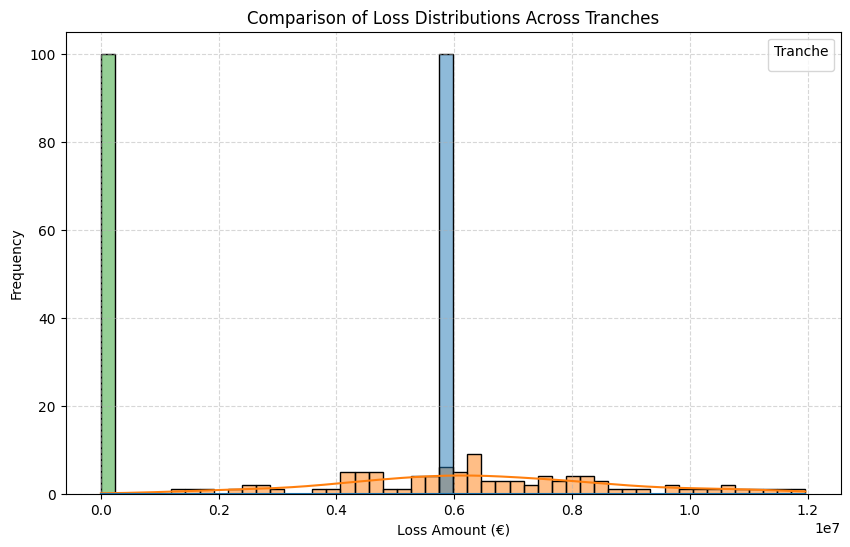

/Users/Mel/Desktop/Ecole_Inge/MFD/Risque de Credit et Défaut/Copulas_For_Credit_Risk/risk_metrics.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Tranche", y="Losses", data=all_losses_df, palette="Set2")


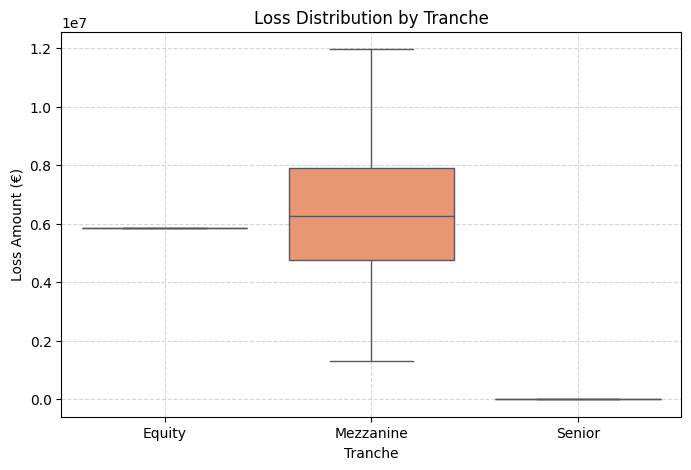

<Figure size 800x500 with 0 Axes>

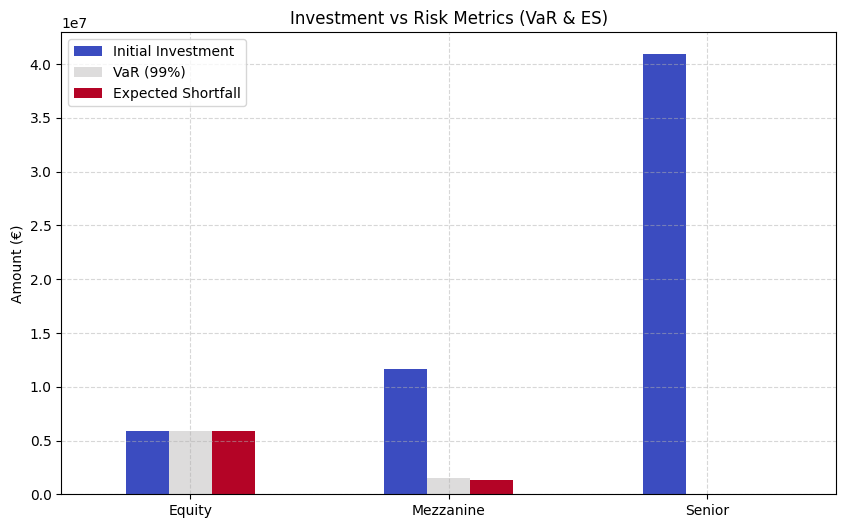


🔹 **Tranche Risk Summary (VaR, Expected Shortfall & Loss Ratios)** 🔹
|           | VaR         | ES          | Loss Ratio (%)   | Initial Investment   |
|:----------|:------------|:------------|:-----------------|:---------------------|
| Equity    | 5,844,429 € | 5,844,429 € | 100.00 %         | 5,844,429 €          |
| Mezzanine | 1,503,645 € | 1,297,649 € | 55.27 %          | 11,688,859 €         |
| Senior    | 0 €         | 0 €         | 0.00 %           | 40,911,005 €         |


In [7]:
analysis = risk.tranche_risk_analysis(losses_per_period,[0.1, 0.3, 0.7],["Equity", "Mezzanine", "Senior"], portfolio, initial_investment_dict)

In [7]:
analysis

{'Equity': {'VaR': np.float64(0.0),
  'ES': np.float64(0.0),
  'Losses': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])},
 'Mezzanine': {'VaR': np.float64(5844429.282941959),
  'ES': np.float64(5844429.282941959),
  'Losses': array([5844429.28294196, 5844429.28294196, 5844429.28294196,
         5844429.28294196, 5844429.28294196, 5844429.28294196,
         5844429.28294196, 5844429.28294196, 5844429.28294196,
         5844429.28294196, 5844429.28294196, 5844429.28294196,
         5844429.28294196, 5844429.28294196, 5844429.28294196,
         5844429.28294196, 5844429.28294196, 5844429.28